In [9]:
!git clone https://github.com/Aman-py/data.git

Cloning into 'data'...
remote: Enumerating objects: 21779, done.
remote: Total 21779 (delta 0), reused 0 (delta 0), pack-reused 21779
Receiving objects: 100% (21779/21779), 293.27 MiB | 37.97 MiB/s, done.
Checking out files: 100% (21778/21778), done.


In [10]:
!ls

data  sample_data


In [11]:
!ls data

driving_log.csv  IMG


In [12]:
!ls sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,Dense,MaxPooling2D,Dropout,Flatten
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import random
import ntpath

In [0]:
columns = ['center','left','right','steering','throttle','reverse','speed']

In [0]:
datadir = 'data'

In [0]:
dataset = pd.read_csv(os.path.join(datadir,'driving_log.csv'),names=columns)

In [17]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
1,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
2,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079
3,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000078
4,/home/aman-py/Desktop/Self-Driving-Car/data/IM...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,/home/aman-py/Desktop/Self-Driving-Car/data/I...,0.0,0.0,0.0,0.000079


In [0]:
def removePath(path):
  base,tail = ntpath.split(path)
  return tail

In [0]:
path = removePath('/home/aman-py/Desktop/Self-Driving-Car/data/I')

In [20]:
path

'I'

In [0]:
dataset['center'] = dataset['center'].apply(removePath)

In [0]:
dataset['left'] = dataset['left'].apply(removePath)

In [0]:
dataset['right'] = dataset['right'].apply(removePath)

In [24]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_10_17_16_36_30_865.jpg,left_2018_10_17_16_36_30_865.jpg,right_2018_10_17_16_36_30_865.jpg,0.0,0.0,0.0,0.000078
1,center_2018_10_17_16_36_30_966.jpg,left_2018_10_17_16_36_30_966.jpg,right_2018_10_17_16_36_30_966.jpg,0.0,0.0,0.0,0.000078
2,center_2018_10_17_16_36_31_098.jpg,left_2018_10_17_16_36_31_098.jpg,right_2018_10_17_16_36_31_098.jpg,0.0,0.0,0.0,0.000079
3,center_2018_10_17_16_36_31_253.jpg,left_2018_10_17_16_36_31_253.jpg,right_2018_10_17_16_36_31_253.jpg,0.0,0.0,0.0,0.000078
4,center_2018_10_17_16_36_31_366.jpg,left_2018_10_17_16_36_31_366.jpg,right_2018_10_17_16_36_31_366.jpg,0.0,0.0,0.0,0.000079


In [0]:
num_bins = 25

In [0]:
hist,bins = np.histogram(dataset['steering'],num_bins)

In [27]:
print(hist)
print(bins)

[  48   16   13   15   21   36   48   69  161  174  337  239 5454   56
  160   82   97   99   37   25   32   15   12    5    8]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


In [0]:
center = (bins[:-1]+bins[1:])*0.5

In [29]:
center

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

In [0]:
center1 = []
for i in range(0,len(bins)-1):
  x = (bins[i] + bins[i+1]) * 0.5
  center1.append(x)

In [31]:
center1

[-0.96,
 -0.88,
 -0.8,
 -0.72,
 -0.6399999999999999,
 -0.56,
 -0.48,
 -0.39999999999999997,
 -0.32,
 -0.24,
 -0.15999999999999998,
 -0.08000000000000002,
 0.0,
 0.08000000000000007,
 0.16000000000000003,
 0.24,
 0.32000000000000006,
 0.4,
 0.48,
 0.56,
 0.64,
 0.72,
 0.8,
 0.88,
 0.96]

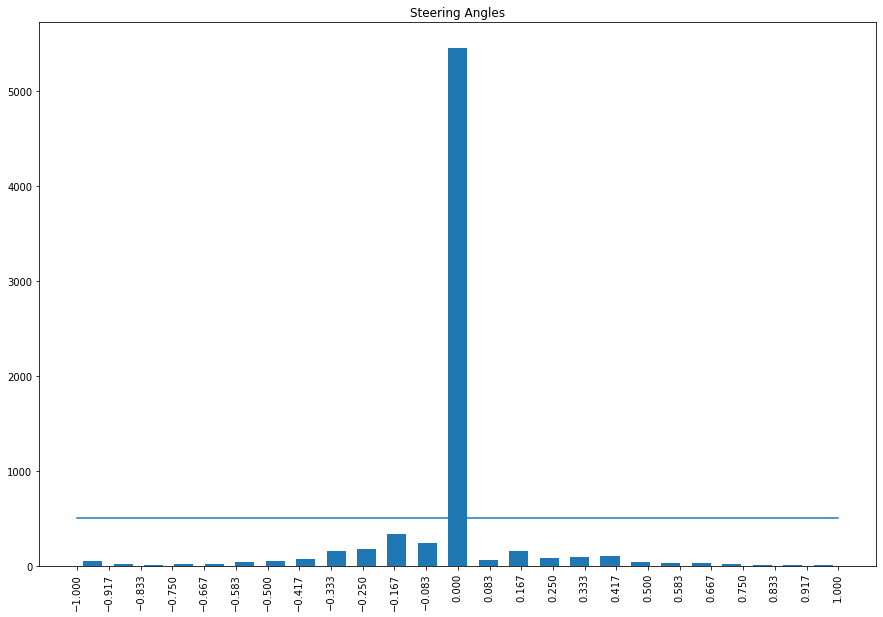

In [32]:
threshold = 500
plt.figure(figsize=(15,10))
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [0]:
remove_list = []
for i in range(num_bins):
  List = []
  for j in range(len(dataset['steering'])):
    if dataset['steering'][j] >= bins[i] and dataset['steering'][j] <= bins[i+1]:
      List.append(j)
  List = shuffle(List)
  List = List[threshold:]
  remove_list.extend(List)

In [34]:
dataset['steering'] 

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7254    0.0
7255    0.0
7256    0.0
7257    0.0
7258    0.0
Name: steering, Length: 7259, dtype: float64

In [35]:
len(remove_list)

4954

In [0]:
dataset.drop(dataset.index[remove_list],inplace=True)

In [0]:
hist,_ = np.histogram(dataset['steering'],num_bins)

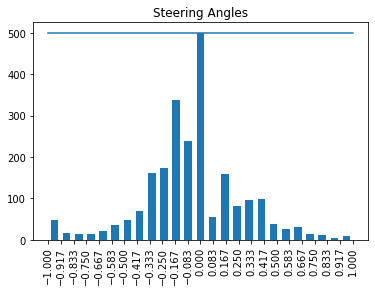

In [38]:
plt.bar(center,hist,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=90)
(x1,x2) = (np.min(dataset['steering']),np.max(dataset['steering']))
(y1,y2) = (threshold,threshold)
plt.title('Steering Angles')
plt.plot((x1,x2),(y1,y2))

In [0]:
def loadImageSteering(datadir,dataset):
  imagePath = []
  steeringPath = []
  for i in range(len(dataset)):
    center = dataset.iloc[i][0]
    steering = float(dataset.iloc[i][3])
    imagePath.append(os.path.join(datadir,center))
    steeringPath.append(steering)
  imagePath = np.asarray(imagePath)
  steeringPath = np.asarray(steeringPath)
  return imagePath,steeringPath

In [0]:
imagePath,steeringPath = loadImageSteering(datadir+'/IMG',dataset)

In [41]:
imagePath[153]

'data/IMG/center_2018_10_17_16_37_26_141.jpg'

In [42]:
steeringPath[153]

0.0

In [43]:
steeringPath[0]

0.0

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(imagePath,steeringPath,random_state=6,test_size=0.2)

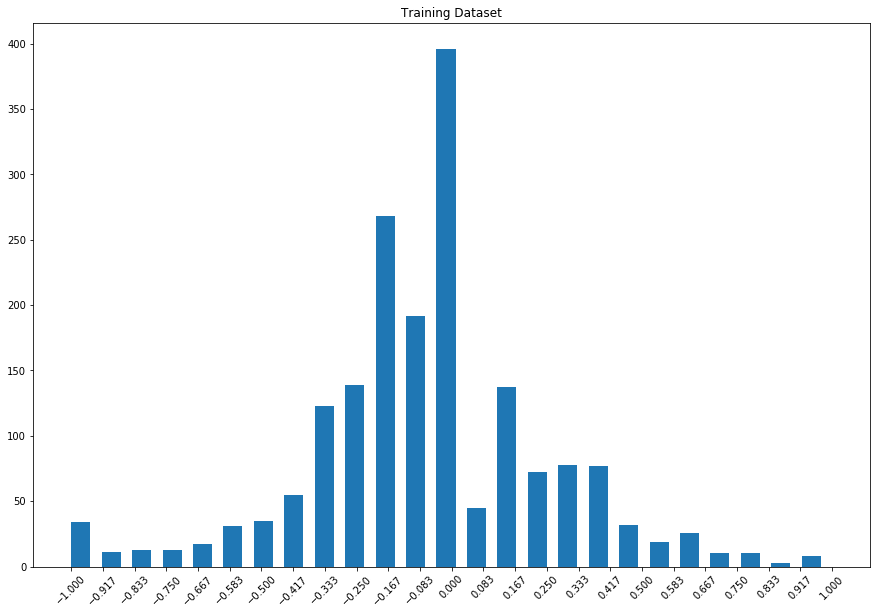

In [46]:
plt.figure(figsize=(15,10))
plt.hist(y_train,bins=num_bins,width=0.05)
plt.xticks(np.linspace(-1,1,25),rotation=45)
plt.title("Training Dataset")
plt.show()

In [0]:
def imagePreprocessing(img):
  img = mpimg.imread(img)
  img = img[60:135,:,:]
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img

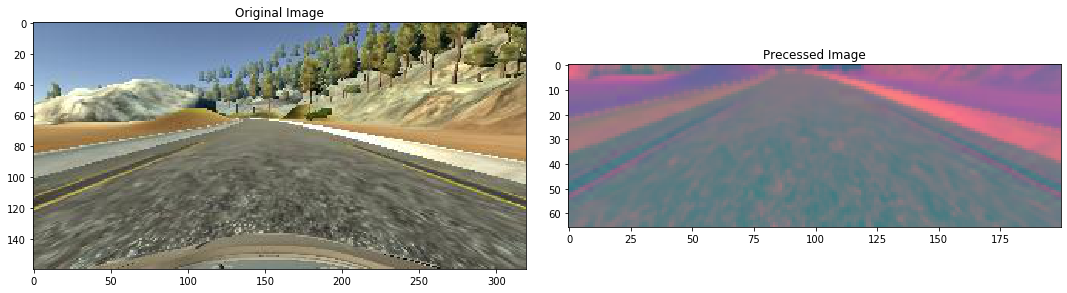

In [48]:
image = imagePath[153]
image = mpimg.imread(image)
fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].grid(False)
axs[0].set_title("Original Image")
axs[1].imshow(imagePreprocessing(imagePath[153]))
axs[1].grid(False)
axs[1].set_title("Precessed Image")
plt.show()

In [0]:
x_train = np.array(list(map(imagePreprocessing,x_train)))
x_test = np.array(list(map(imagePreprocessing,x_test)))

In [0]:
def nvidiaModel():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation="elu"))
  model.add(Convolution2D(48,(5,5),strides=(2,2),activation="elu")) 
  model.add(Convolution2D(64,(3,3),activation="elu"))   
  model.add(Convolution2D(64,(3,3),activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(50,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(10,activation="elu"))
  model.add(Dropout(0.5))
  
  model.add(Dense(1))
  model.compile(optimizer=Adam(lr=1e-3),loss="mse")
  
  return model

In [51]:
model = nvidiaModel()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [54]:
h = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=100,shuffle=1,verbose=1)

Train on 1844 samples, validate on 461 samples
Epoch 1/10
1844/1844 [==============================] - 14s 7ms/step - loss: 0.0954 - val_loss: 0.0767
Epoch 2/10
1844/1844 [==============================] - 14s 7ms/step - loss: 0.0897 - val_loss: 0.0809
Epoch 3/10
1844/1844 [==============================] - 14s 7ms/step - loss: 0.0885 - val_loss: 0.0726
Epoch 4/10
1844/1844 [==============================] - 14s 7ms/step - loss: 0.0867 - val_loss: 0.0710
Epoch 5/10
1844/1844 [==============================] - 14s 7ms/step - loss: 0.0784 - val_loss: 0.0676
Epoch 6/10
1844/1844 [==============================] - 14s 7ms/step - loss: 0.0809 - val_loss: 0.0683
Epoch 7/10
1844/1844 [==============================] - 14s 7ms/step - loss: 0.0823 - val_loss: 0.0722
Epoch 8/10
1844/1844 [==============================] - 14s 7ms/step - loss: 0.0762 - val_loss: 0.0630
Epoch 9/10
1844/1844 [==============================] - 14s 7ms/step - loss: 0.0794 - val_loss: 0.0683
Epoch 10/10
1844/1844 [===

In [0]:
model.save('model_car.h5')

In [0]:
from google.colab import files

In [0]:
files.download('self_drive.h5')

In [0]:
dataset

,center,left,right,steering,throttle,reverse,speed
2,center_2018_10_17_16_36_31_098.jpg,left_2018_10_17_16_36_31_098.jpg,right_2018_10_17_16_36_31_098.jpg,0.000000,0.000000,0.0,0.000079
14,center_2018_10_17_16_36_32_563.jpg,left_2018_10_17_16_36_32_563.jpg,right_2018_10_17_16_36_32_563.jpg,0.000000,0.000000,0.0,0.000078
24,center_2018_10_17_16_36_33_682.jpg,left_2018_10_17_16_36_33_682.jpg,right_2018_10_17_16_36_33_682.jpg,-0.306537,1.000000,0.0,5.495484
26,center_2018_10_17_16_36_33_915.jpg,left_2018_10_17_16_36_33_915.jpg,right_2018_10_17_16_36_33_915.jpg,-0.136497,1.000000,0.0,8.006332
28,center_2018_10_17_16_36_34_171.jpg,left_2018_10_17_16_36_34_171.jpg,right_2018_10_17_16_36_34_171.jpg,0.000000,0.572349,0.0,10.217970
29,center_2018_10_17_16_36_34_282.jpg,left_2018_10_17_16_36_34_282.jpg,right_2018_10_17_16_36_34_282.jpg,-0.139548,0.515253,0.0,10.777860
30,center_2018_10_17_16_36_34_395.jpg,left_2018_10_17_16_36_34_395.jpg,right_2018_10_17_16_36_34_395.jpg,-0.434979,0.810685,0.0,11.526860
31,center_2018_10_17_16_36_34_513.jpg,left_2018_10_17_16_36_34_513.jpg,right_2018_10_17_16_36_34_513.jpg,-0.237966,0.410548,0.0,11.953340
32,center_2018_10_17_16_36_34_640.jpg,left_2018_10_17_16_36_34_640.jpg,right_2018_10_17_16_36_34_640.jpg,-0.486603,0.061009,0.0,12.276230
33,center_2018_10_17_16_36_34_773.jpg,left_2018_10_17_16_36_34_773.jpg,right_2018_10_17_16_36_34_773.jpg,-0.402027,0.000000,0.0,11.980360
